# WRANGLE AND ANALYSE DATA 

In [3]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy

## 1. Gathering Data

In [4]:
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.set_index("tweet_id", inplace = True)
archive.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [116]:
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [117]:
consumer_key = #
consumer_secret = #
access_token = #
access_token_secret = #

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [118]:
df = []
exceptions = []
tweet_id = images['tweet_id']

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        time = pd.to_datetime(page['created_at'])
        df.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    
    except Exception as e:
        exceptions.append(id)

In [119]:
exceptions

[802247111496568832,
 842892208864923648,
 861769973181624320,
 873697596434513921,
 888202515573088257]

In [120]:
exceptions2 = []
for e in exceptions:
    try:
        page = api.get_status(e)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        time = pd.to_datetime(page['created_at'])
        df.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        
    except Exception:
        exceptions2.append(id)

In [121]:
df = pd.DataFrame(df, columns = ['tweet_id', 'favorites', 'retweets'])
df.to_csv('tweet_json.txt', encoding = 'utf-8')

In [122]:
df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df.set_index('tweet_id', inplace = True)
df.tail()

,Unnamed: 0,favorites,retweets
tweet_id,,,
891327558926688256,2065,40779,9634
891689557279858688,2066,42611,8850
891815181378084864,2067,25318,4265
892177421306343426,2068,33609,6422
892420643555336193,2069,39246,8760


In [123]:
images.set_index('tweet_id', inplace = True)
df2 = pd.merge(left=archive, right=images, left_index=True, right_index=True, how='left')
df2 = pd.merge(left=df2, right=df, left_index=True, right_index=True, how='left')
df2.to_csv('df2copy.csv', encoding = 'utf-8')

## 2. Assessing Data

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [10]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Buddy          7
Bailey         7
Daisy          7
Toby           7
Koda           6
Jax            6
Stanley        6
Milo           6
Leo            6
Oscar          6
Dave           6
Rusty          6
Jack           6
Scout          6
Bella          6
very           5
            ... 
Siba           1
Mimosa         1
Blipson        1
Kevon          1
Rumble         1
Callie         1
Mingus         1
Thor           1
Laela          1
Cheesy         1
Toffee         1
Bradlay        1
Pippin         1
Buddah         1
Juckson        1
Iroh           1
Grizzwald      1
Dex            1
Superpup       1
General        1
Winifred       1
Benny          1
Chase          1
Bradley        1
Hector         1
Tobi           1
Eevee          1
Farfle        

In [11]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet = pd.read_csv("tweet_json.txt", encoding = 'utf-8')
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 4 columns):
Unnamed: 0    2070 non-null int64
tweet_id      2070 non-null int64
favorites     2070 non-null int64
retweets      2070 non-null int64
dtypes: int64(4)
memory usage: 64.8 KB


### Quality
 
1. The ‘name’ column had several entries which did not look like name and We can also find that the most frequent value in the name column is "a", which is not a name.


2.  Some of the ratings did not seem like right format of ratings.  


3. The values in the numerator and denominator columns are unusual. 


4. There are 2075 rows in the images dataframe and 2356 rows in the archive dataframe. The number of rows in archive data and images data did not match, which has to be wrangled for better analysis.  


5. Several columns in the data, null values are treated as non-null values and some entries seem to contain “Nan” value as string.  


6. The Unnamed: 0 column is not necessary for data analysis, so it should be removed.  


7. The columns for dog breed predictions may be condensed and made into a single column. The dog stages values in the data is named as columns instead of one column containing all the dog stages values. 


8. For more clarity, we merge the datasets. 

### Tidiness

- The dog stages have values as columns, instead of one column filled with their values.


- We don't need the 'Unnamed: 0' column from the 'tweet' dataframe.


- The columns for dog breed predictions can be condensed.

## 3. Cleaning Data

In [3]:
df = pd.read_csv("df2copy.csv")

### Define: Delete Unnamed column 

### Code:

In [14]:
del(df['Unnamed: 0'])

### Test:

In [17]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets'],
      dtype='object')

### Define: Convert timestamp from string object to datetime object
### Code:

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                 

### Define: Remove Retweets and Tweets which does not include images

### Code:

In [20]:
# removing the tweets without images
df = df[pd.notnull(df['jpg_url'])]

In [21]:
# removing retweets
df = df[pd.isnull(df['retweeted_status_id'])]
df.shape[0]

1994

In [22]:
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test:

In [23]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets'],
      dtype='object')

### Define: Condensing Dog Type columns

### Code:

In [24]:
dog_type = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in df['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_type.append(y[x.index(word)])
            break
    else:
        dog_type.append('None')

df['dog_type'] = dog_type

In [25]:
df['dog_type'].value_counts()

None      1625
pupper     237
doggo       69
floof       34
puppo       29
Name: dog_type, dtype: int64

In [26]:
# removing extra columns
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test:

In [27]:
#test
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorites', 'retweets', 'dog_type'],
      dtype='object')

### Define: Condensing dog breed predictions
### Code:

In [29]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

In [30]:
#removing the processed columns
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

### Test:

In [31]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,favorites,retweets,dog_type,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,39246.0,8760.0,None,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,33609.0,6422.0,None,Chihuahua,0.323581


### Define: Removing columns that are not necessary
### Code:

In [32]:
df['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.558181e+17    1
6.753494e+17    1
6.747934e+17    1
6.747522e+17    1
7.468859e+17    1
6.706684e+17    1
6.844811e+17    1
6.749998e+17    1
6.842229e+17    1
7.291135e+17    1
6.754971e+17    1
6.717299e+17    1
6.715610e+17    1
7.030419e+17    1
6.757073e+17    1
7.590995e+17    1
6.914169e+17    1
7.032559e+17    1
6.678065e+17    1
6.920419e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, dtype: int64

In [33]:
df['in_reply_to_user_id'].value_counts()

4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64

These all reply to a single user id, i.e., @dog_rates

In [34]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test:

In [35]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'favorites', 'retweets', 'dog_type', 'breed', 'confidence'],
      dtype='object')

### Define: Extract Dog Rates and Dog Count
### Code:

In [36]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

df['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
df['rating'] = rating # not need to also add denominator since they are all 10!
df['dog_count'] = dog_count
df['rating'].value_counts()

12.0                 453
10.0                 411
11.0                 399
13.0                 261
9.0                  152
8.0                   94
7.0                   52
14.0                  36
6.0                   32
5.0                   30
3.0                   19
4.0                   14
2.0                    9
8.5                    4
1.0                    4
7.5                    3
9.5                    3
5.5                    2
6.5                    2
10.5                   2
0.0                    2
1776.0                 1
9.75                   1
9.666666666666666      1
4.5                    1
11.27                  1
13.5                   1
NaN                    1
420.0                  1
11.5                   1
11.26                  1
Name: rating, dtype: int64

In [37]:
df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id         1994 non-null int64
timestamp        1994 non-null datetime64[ns]
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
name             1994 non-null object
jpg_url          1994 non-null object
img_num          1994 non-null float64
favorites        1994 non-null float64
retweets         1994 non-null float64
dog_type         1994 non-null object
breed            1994 non-null object
confidence       1994 non-null float64
rating           1994 non-null object
dog_count        1994 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 329.2+ KB


In [39]:
df['dog_count'].value_counts()

1.0     1958
2.0       23
5.0        2
8.0        2
3.0        1
12.0       1
11.0       1
13.0       1
4.0        1
9.0        1
17.0       1
15.0       1
7.0        1
Name: dog_count, dtype: int64

### Define:  Extract Names of Dogs
### Code:

In [40]:
df['text_split'] = df['text'].str.split()

In [41]:
names = []

# use string starts with method to clean this up

def extract_names(row):
    
    # 'named Phineas'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have Phineas'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is Phineas'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to Phineas'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet Phineas'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

df['names'] = names

In [42]:
df['names'].value_counts()

Nameless    625
Charlie      11
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Daisy         7
Toby          6
Jax           6
Koda          6
Bella         6
Bo            6
Stanley       6
Rusty         5
Buddy         5
Milo          5
Oscar         5
Scout         5
Chester       5
Bailey        5
Leo           5
Louis         5
Clarence      4
Reggie        4
Brody         4
Alfie         4
           ... 
Jamesy        1
Iggy          1
Gustav        1
Farfle        1
Nollie        1
Timber        1
Chubbs        1
Andru         1
Willy         1
Cecil         1
Marq          1
Ebby          1
Benny         1
Meera         1
Mason         1
Fwed          1
Happy         1
Kane          1
Robin         1
Kobe          1
Crouton       1
Jameson       1
Klint.        1
Theo          1
Chevy         1
Katie         1
Lance         1
Butters       1
Mauve         1
Tonks         1
Name: names, Length: 938

"a", "the" and all non-name words have been removed.

In [43]:
df.drop(['text_split'], axis=1, inplace=True)

In [44]:
df.loc[df['names'] == 'Nameless', 'names'] = None
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan

### Test:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id         1994 non-null int64
timestamp        1994 non-null datetime64[ns]
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
name             1994 non-null object
jpg_url          1994 non-null object
img_num          1994 non-null float64
favorites        1994 non-null float64
retweets         1994 non-null float64
dog_type         369 non-null object
breed            1686 non-null object
confidence       1686 non-null float64
rating           1992 non-null object
dog_count        1994 non-null float64
names            1369 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 344.8+ KB


Saving the cleaned file.

In [48]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

## 4.Analysis of given Tweets

In [49]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

###  Correlation - Retweets, Favorites, Ratings

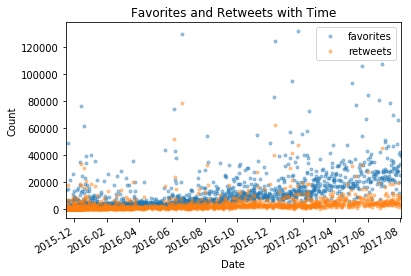

In [51]:
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

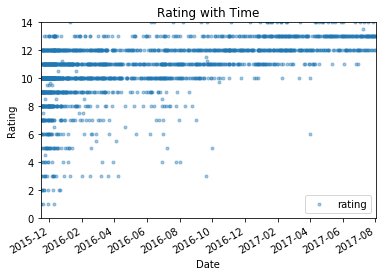

In [52]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

Here you can see the gradual increase of both favorites and retweets over time.

In [53]:
df[['favorites', 'rating', 'retweets']].corr(method='pearson')

,favorites,rating,retweets
favorites,1.000000,0.023010,0.916447
rating,0.023010,1.000000,0.023557
retweets,0.916447,0.023557,1.000000


So Brant was right, there are more ratings above 10. Still don't know the reason why there are so much high ratings.

So let's see if dogs with higher ratings were getting more favorites and retweets. According to me, if the dogs are getting better they should be getting more favorites and retweets along with the higher rating. There is a strong correlation between favorites and retweets. This means that if the tweet is good in general then there will be more retweets and favorites.

Yet there is no correlation between rating and retweets or rating and favorites. It can be because the dogs are not actually getting better. It can be that 'lower quality' dogs are given funnier captions. In this case, it is the caption that is getting more retweets and favorites, rather than the dog itself.

### Dog Stages Boxplot

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


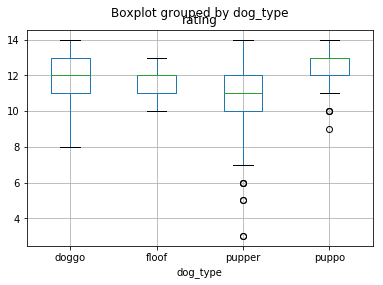

In [54]:
df.boxplot(column='rating', by='dog_type');

In [55]:
df.groupby('dog_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,69.0,11.797101,1.510548,8.0,11.0,12.0,13.0,14.0
floof,34.0,11.705882,0.759961,10.0,11.0,12.0,12.0,13.0
pupper,237.0,10.616160,1.833623,3.0,10.0,11.0,12.0,14.0
puppo,29.0,12.172414,1.197288,9.0,12.0,13.0,13.0,14.0


In [56]:
df.reset_index(inplace=True)
df.groupby('dog_type')['timestamp'].describe()

,count,unique,top,freq,first,last
dog_type,,,,,,
doggo,69,69,2016-11-18 23:35:32,1,2016-04-02 01:52:38,2017-07-26 15:59:51
floof,34,34,2016-07-05 20:41:01,1,2016-01-08 03:50:03,2017-07-18 00:07:08
pupper,237,237,2016-01-30 02:41:58,1,2015-11-26 21:36:12,2017-07-15 23:25:31
puppo,29,29,2017-01-29 02:44:34,1,2016-06-03 01:07:16,2017-07-25 01:55:32


So puppers are getting much lower rates than the other dog types. They have several low outliers which decrease the mean to 10.6.

Floofers are consistently rated above 10. I don't know whether they are really good or the rating just gets higher with time. Maybe we can see if 'floof' is a newer term.

Here we see that 'floof' is not a new term, first seen on January 2016. So we can say that floofer are consistently good dogs.

### Most Rated Dog Breeds

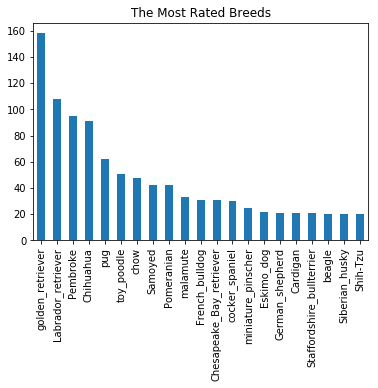

In [57]:
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

It's difficult to know why these breeds are the top breeds. It could be because they are commonly owned. Or they could be the easiest to identify by the AI that identified them.

In [58]:
top.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.00,12.0,13.0
Chesapeake_Bay_retriever,31.0,10.741935,1.510358,8.0,10.00,10.00,12.0,13.0
Chihuahua,91.0,10.516484,2.071568,3.0,9.50,11.00,12.0,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.00,12.0,14.0
French_bulldog,31.0,11.193548,1.796652,8.0,10.00,12.00,12.0,14.0
German_shepherd,21.0,11.000000,1.449138,8.0,10.00,11.00,12.0,13.0
Labrador_retriever,108.0,11.180556,1.324567,7.0,10.00,11.00,12.0,14.0
Pembroke,95.0,11.389474,1.746088,4.0,11.00,12.00,12.0,14.0
Pomeranian,42.0,10.779762,1.619435,6.0,10.00,11.00,12.0,14.0


In [59]:
df['rating'].describe()

count    1991.000000
mean       11.647638
std        40.668547
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [60]:
df[df['rating'] <= 14]['rating'].describe()

count    1989.000000
mean       10.555277
std         2.157977
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

Here we have a statistical comparison of the top breeds with all the ratings. Only one of the top breeds has a mean higher than the total population mean. This is because of these two ratings: 420 and 1776. Excluding outliers bring down the mean to 10.55.

## Thankyou :) I hope it was insightful!